In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('data/housing.csv')

In [3]:
features = ['Powierzchnia', 'Liczba pokoi', 'Rok budowy']
target = 'Cena'

X = df[features].values
y = df[target].values

In [4]:
model = LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
y_pred = model.predict(X)

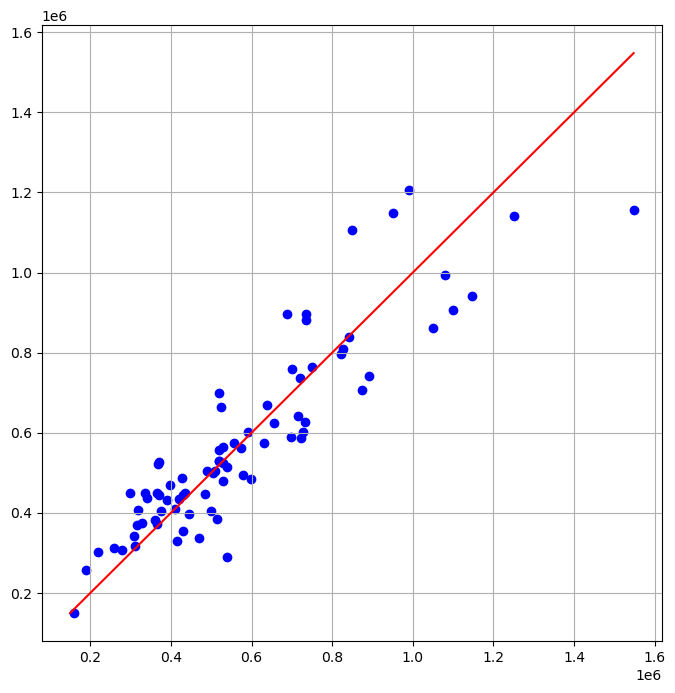

In [6]:
plt.figure(figsize = (8,8))
plt.scatter(y, y_pred, color='blue')

minVal = min(y.min(), y_pred.min())
maxVal = max(y.max(), y_pred.max())

plt.plot([minVal, maxVal], [minVal, maxVal], color='red')

plt.grid(True)
plt.show()

In [7]:
r2 = r2_score(y, y_pred)
print(f'Współczynnik R^2: {r2:.4f}')

Współczynnik R^2: 0.8100


In [8]:
print("Współczynniki regresji:", model.coef_)
print("Wyraz wolny (b):", model.intercept_)

Współczynniki regresji: [  8239.02571364 -20570.6416858    2969.93400125]
Wyraz wolny (b): -5815414.809230043


In [9]:
residuals = y - y_pred
std_res = np.std(residuals)

In [10]:
filter = np.abs(residuals) <= 3 * std_res

In [11]:
X_filtered = X[filter]
y_filtered = y[filter]

In [12]:
model_filtered = LinearRegression()
model_filtered.fit(X_filtered, y_filtered)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_filtered_pred = model_filtered.predict(X_filtered)

In [14]:
r2_filtered = r2_score(y_filtered, y_filtered_pred)
print(r2_filtered)

0.8114745632094442


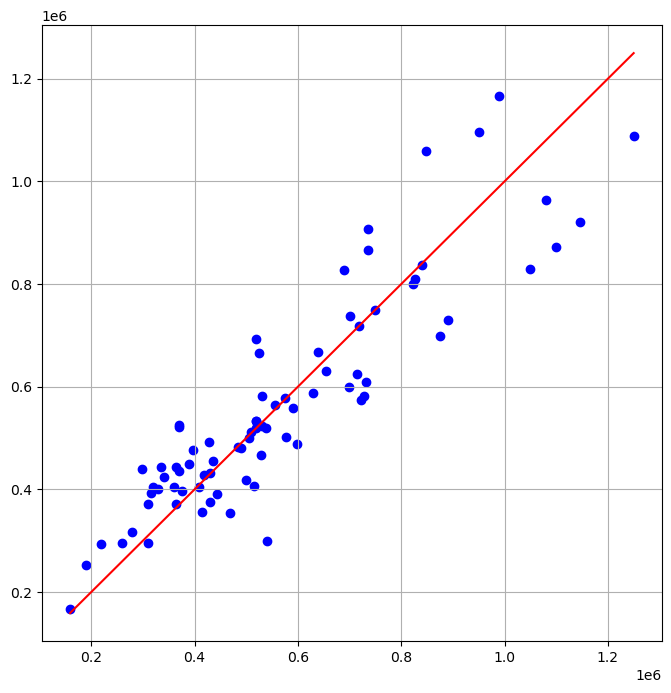

In [15]:
plt.figure(figsize = (8,8))
plt.scatter(y_filtered, y_filtered_pred, color='blue')

minVal = min(y_filtered.min(), y_filtered_pred.min())
maxVal = max(y_filtered.max(), y_filtered_pred.max())

plt.plot([minVal, maxVal], [minVal, maxVal], color='red')

plt.grid(True)
plt.show()

In [16]:
print("Współczynniki regresji:", model_filtered.coef_)
print("Wyraz wolny (b):", model_filtered.intercept_)

Współczynniki regresji: [6903.40188731 7330.16681196 2928.12141259]
Wyraz wolny (b): -5728808.1865313295
